
___
# Logistic Regression with Python

Step1
Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the Churn-Modelling.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('Churn-Modelling.csv')

In [4]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [5]:
Male=pd.get_dummies(train['Gender'],drop_first=True)

In [6]:
Country=pd.get_dummies(train['Geography'],drop_first=True)

In [7]:
train.drop(['RowNumber','CustomerId','Surname','Geography', 'Gender'],axis=1,inplace=True)

In [8]:
train = pd.concat([train,Male,Country],axis=1)

In [9]:
train.insert(0,'const',1)

In [10]:
train.head()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,1,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,1,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,1,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
train.describe()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.250900,0.247700
std,0.0,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.433553,0.431698
min,1.0,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.0,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,1.0,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,1.0,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,1.0,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

In [19]:
view=train[['CreditScore','Age','Balance','EstimatedSalary','Male']]
view.head()

,CreditScore,Age,Balance,EstimatedSalary,Male
0,619,42,0.00,101348.88,0
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,0
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0


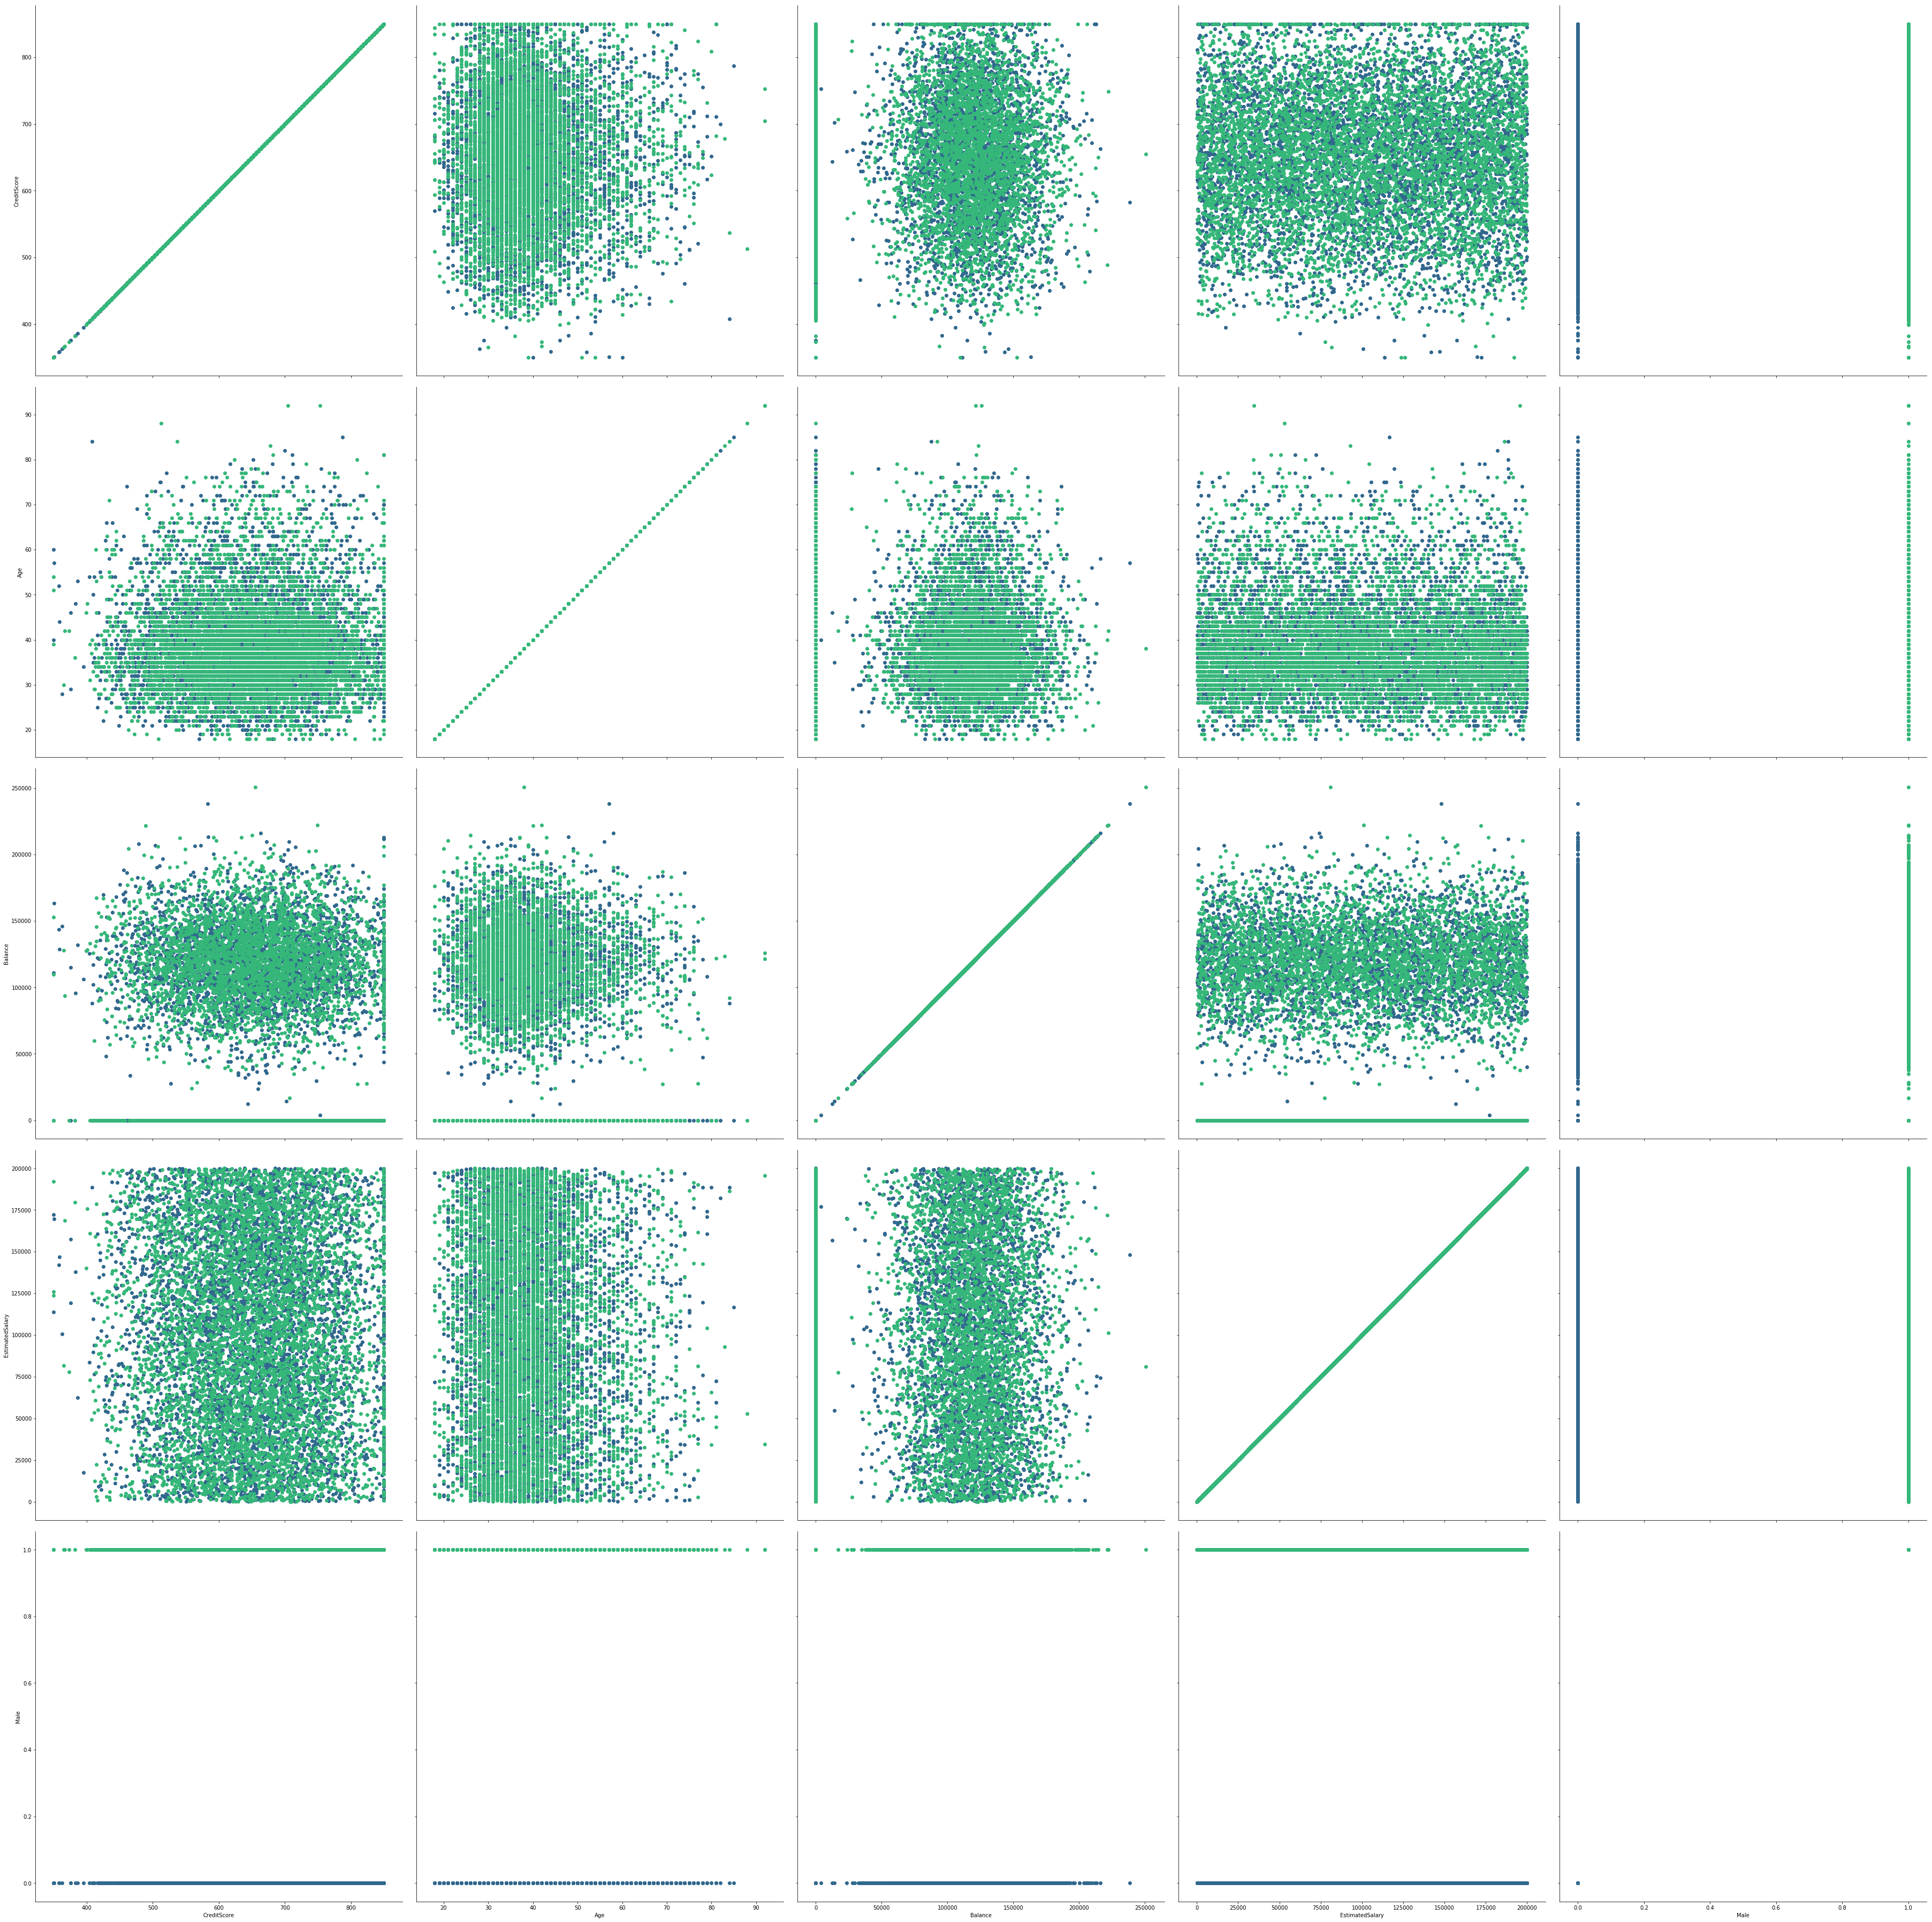

In [25]:
sns.PairGrid(view, hue= 'Male', palette='viridis', size= 10).map(plt.scatter)

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), train['Exited'], test_size=0.20, random_state=101)

## Training and Predicting

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = classifier.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.98      0.88      1577
          1       0.36      0.04      0.07       423

avg / total       0.70      0.78      0.71      2000



In [33]:
print(confusion_matrix(y_test,predictions))

[[1547   30]
 [ 406   17]]


# K-Folds Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [41]:
accuracies

array([ 0.78776529,  0.79151061,  0.79650437,  0.79650437,  0.78875   ,
        0.79125   ,  0.78598248,  0.79849812,  0.79724656,  0.80225282])

In [37]:
accuracies.std()

0.0050448481081911351

In [44]:
from statsmodels.discrete.discrete_model import Logit

In [45]:
X_opt=train.drop('Exited',axis=1)

In [46]:
y=train['Exited']

In [48]:
Logregressor_OLS=Logit(endog=y,exog=X_opt).fit()

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6


In [49]:
Logregressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 Jan 2018   Pseudo R-squ.:                  0.1532
Time:                        20:46:39   Log-Likelihood:                -4280.7
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3923      0.245    -13.857      0.000      -3.872      -2.912
CreditScore        -0.0007      0.000     -2.384      0.017      -0.001      -0.000
Age                 0.0727      0.003     28.230      0.000       0.068       0.078
Tenure             -0.0159      0.009     -1.705      0.088      -0.034       0.002
Balance          2.637e-06   5.14e-07      5.128      0.000    1.63e-06    3.64e-06
NumOfProducts      -0.1015      0.047     -2.154      0.031      -0.194      -0.009
HasCrCard          -0.0447      0.059     -0.753      0.452      -0.161       0.072
IsActiveMember     -1.0754      0.058    -18.643      0.000      -1.189      -0.962
EstimatedSalary  4.807e-07   4.74e-07      1.015      0.310   -4.48e-07    1.41e-06
Male               -0.5285      0.054     -9.699      0.000      -0.635      -0.422
Germany             0.7747      0.068     11.448      0.000       0.642       0.907
Spain               0.0352      0.071      0.499      0.618      -0.103       0.174
===================================================================================
"""

Spain has the highest p-value and will be dropped

In [50]:
X_opt=X_opt.drop('Spain',axis=1)
Logregressor_OLS=Logit(endog=y,exog=X_opt).fit()
Logregressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.428080
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Jan 2018   Pseudo R-squ.:                  0.1531
Time:                        20:50:04   Log-Likelihood:                -4280.8
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3826      0.244    -13.863      0.000      -3.861      -2.904
CreditScore        -0.0007      0.000     -2.378      0.017      -0.001      -0.000
Age                 0.0727      0.003     28.238      0.000       0.068       0.078
Tenure             -0.0160      0.009     -1.708      0.088      -0.034       0.002
Balance          2.637e-06   5.14e-07      5.129      0.000    1.63e-06    3.65e-06
NumOfProducts      -0.1013      0.047     -2.149      0.032      -0.194      -0.009
HasCrCard          -0.0449      0.059     -0.757      0.449      -0.161       0.071
IsActiveMember     -1.0752      0.058    -18.640      0.000      -1.188      -0.962
EstimatedSalary  4.813e-07   4.74e-07      1.016      0.310   -4.47e-07    1.41e-06
Male               -0.5283      0.054     -9.697      0.000      -0.635      -0.422
Germany             0.7629      0.063     12.041      0.000       0.639       0.887
===================================================================================
"""

HasCrCard has a P-value above threshold

In [51]:
X_opt=X_opt.drop('HasCrCard',axis=1)
Logregressor_OLS=Logit(endog=y,exog=X_opt).fit()
Logregressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.428109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 22 Jan 2018   Pseudo R-squ.:                  0.1531
Time:                        20:51:22   Log-Likelihood:                -4281.1
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.4159      0.240    -14.229      0.000      -3.886      -2.945
CreditScore        -0.0007      0.000     -2.369      0.018      -0.001      -0.000
Age                 0.0727      0.003     28.243      0.000       0.068       0.078
Tenure             -0.0162      0.009     -1.727      0.084      -0.034       0.002
Balance          2.645e-06   5.14e-07      5.146      0.000    1.64e-06    3.65e-06
NumOfProducts      -0.1013      0.047     -2.150      0.032      -0.194      -0.009
IsActiveMember     -1.0744      0.058    -18.631      0.000      -1.187      -0.961
EstimatedSalary  4.818e-07   4.74e-07      1.017      0.309   -4.47e-07    1.41e-06
Male               -0.5285      0.054     -9.700      0.000      -0.635      -0.422
Germany             0.7619      0.063     12.028      0.000       0.638       0.886
===================================================================================
"""

EstimatedSalary has a P-value above threshold

In [53]:
X_opt=X_opt.drop('EstimatedSalary',axis=1)
Logregressor_OLS=Logit(endog=y,exog=X_opt).fit()
Logregressor_OLS.summary()

Optimization terminated successfully.
         Current function value: 0.428161
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 Jan 2018   Pseudo R-squ.:                  0.1530
Time:                        20:53:32   Log-Likelihood:                -4281.6
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.3669      0.235    -14.320      0.000      -3.828      -2.906
CreditScore       -0.0007      0.000     -2.378      0.017      -0.001      -0.000
Age                0.0727      0.003     28.238      0.000       0.068       0.078
Tenure            -0.0160      0.009     -1.710      0.087      -0.034       0.002
Balance         2.653e-06   5.14e-07      5.162      0.000    1.65e-06    3.66e-06
NumOfProducts     -0.1005      0.047     -2.132      0.033      -0.193      -0.008
IsActiveMember    -1.0751      0.058    -18.644      0.000      -1.188      -0.962
Male              -0.5290      0.054     -9.710      0.000      -0.636      -0.422
Germany            0.7621      0.063     12.031      0.000       0.638       0.886
==================================================================================
"""

Tenure is above the 0.05 significance level however length of time a person is with a bank should make them more likely to stay

Now we will check if overfitting occured and if removing parameters increased our accuracy

In [54]:
train_reduced=train.drop(['Spain','HasCrCard','EstimatedSalary'],axis=1,inplace=False)
train_reduced.head()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited,Male,Germany
0,1,619,42,2,0.00,1,1,1,0,0
1,1,608,41,1,83807.86,1,1,0,0,0
2,1,502,42,8,159660.80,3,0,1,0,0
3,1,699,39,1,0.00,2,0,0,0,0
4,1,850,43,2,125510.82,1,1,0,0,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_reduced.drop('Exited',axis=1), train_reduced['Exited'], test_size=0.20, random_state=101)

In [57]:
classifier2 = LogisticRegression()
classifier2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
predictions = classifier2.predict(X_test)

In [59]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.97      0.87      1577
          1       0.35      0.06      0.11       423

avg / total       0.70      0.78      0.71      2000



In [60]:
print(confusion_matrix(y_test,predictions))

[[1526   51]
 [ 396   27]]


In [62]:
accuracies2 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [63]:
accuracies2.mean()

0.79325302363753691

In [64]:
accuracies.mean()

0.79362646191634678

In [65]:
accuracies2.mean()-accuracies.mean()

-0.0003734382788098678

# Conclusion 
Reducing parameters avoids overfitting however it made the model less accurate and therefore was not overfit